# Potato Disease Classification

In [26]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import data into tensorflow dataset object
Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.7 0.1 0.2 -- ./training/PlantVillage/

In [27]:
IMAGE_SIZE = 256
CHANNELS = 3

In [28]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 1506 images belonging to 3 classes.


In [29]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.56168216 0.51462334 0.5303096 ]
  [0.5610756  0.5140168  0.5297031 ]
  [0.56046903 0.5134102  0.5290965 ]
  ...
  [0.4970653  0.45392805 0.4853006 ]
  [0.57153594 0.5283987  0.55977124]
  [0.57366705 0.5305298  0.56190234]]

 [[0.54434687 0.49728805 0.5129743 ]
  [0.5457622  0.4987033  0.51438963]
  [0.5471774  0.50011855 0.5158048 ]
  ...
  [0.502322   0.45918477 0.4905573 ]
  [0.5713337  0.52819645 0.559569  ]
  [0.574678   0.53154075 0.5629133 ]]

 [[0.5459646  0.49890578 0.51459205]
  [0.54535806 0.4982992  0.5139855 ]
  [0.54475147 0.4976927  0.5133789 ]
  ...
  [0.50757873 0.46444148 0.49581403]
  [0.5711315  0.5279943  0.5593668 ]
  [0.5756889  0.53255165 0.5639242 ]]

 ...

 [[0.528466   0.4657209  0.4774856 ]
  [0.5737295  0.51098436 0.52274907]
  [0.61214775 0.54940265 0.56116736]
  ...
  [0.68946654 0.63064295 0.64240766]
  [0.6884556  0.62963206 0.64139676]
  [0.68744475 0.6286212  0.6403859 ]]

 [[0.5302856  0.4675405  0.4793052 ]
  [0.57635784 0.51361275 0.52537745]


In [30]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [31]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


# Building the Model

In [32]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 64)       

# Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [35]:
1506/32

47.0625

In [36]:
215/32

6.71875

In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 122s 3s/step - loss: 0.9166 - accuracy: 0.4993 - val_loss: 0.9098 - val_accuracy: 0.4427
Epoch 2/20
47/47 [==============================] - 102s 2s/step - loss: 0.7424 - accuracy: 0.6716 - val_loss: 0.6155 - val_accuracy: 0.7448
Epoch 3/20
47/47 [==============================] - 92s 2s/step - loss: 0.4722 - accuracy: 0.7965 - val_loss: 0.3664 - val_accuracy: 0.8490
Epoch 4/20
47/47 [==============================] - 68s 1s/step - loss: 0.4048 - accuracy: 0.8202 - val_loss: 0.4031 - val_accuracy: 0.8438
Epoch 5/20
47/47 [==============================] - 68s 1s/step - loss: 0.3133 - accuracy: 0.8697 - val_loss: 0.4092 - val_accuracy: 0.8125
Epoch 6/20
47/47 [==============================] - 69s 1s/step - loss: 0.2765 - accuracy: 0.8948 - val_loss: 0.2886 - val_accuracy: 0.8698
Epoch 7/20
47/47 [==============================] - 69s 1s/step - loss: 0.2321 - accuracy: 0.9050 - val_loss: 0.2786 - val_accuracy: 0.8698
Epoch 8/20
47/47 [

In [38]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 10s 685ms/step - loss: 0.1696 - accuracy: 0.9397


In [39]:
scores

[0.16957561671733856, 0.9396751523017883]

Scores is just a list containing loss and accuracy value

# Plotting the Accuracy and Loss Curves

In [40]:
history

In [41]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [43]:
type(history.history['loss'])

list

In [44]:
len(history.history['loss'])

20

In [45]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9166402220726013,
 0.7423880696296692,
 0.47218257188796997,
 0.4048171937465668,
 0.3132629096508026]

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [47]:
val_acc

[0.4427083432674408,
 0.7447916865348816,
 0.8489583134651184,
 0.84375,
 0.8125,
 0.8697916865348816,
 0.8697916865348816,
 0.9166666865348816,
 0.8854166865348816,
 0.9114583134651184,
 0.8958333134651184,
 0.9270833134651184,
 0.9166666865348816,
 0.9010416865348816,
 0.953125,
 0.921875,
 0.9166666865348816,
 0.9739583134651184,
 0.9583333134651184,
 0.9322916865348816]

In [48]:
acc

[0.4993215799331665,
 0.6716417670249939,
 0.7964721918106079,
 0.8202170729637146,
 0.869742214679718,
 0.8948439359664917,
 0.9050203561782837,
 0.9213025569915771,
 0.9023066759109497,
 0.8962008357048035,
 0.9341926574707031,
 0.9481382966041565,
 0.9620081186294556,
 0.9396200776100159,
 0.960106372833252,
 0.9674355387687683,
 0.9511533379554749,
 0.9694148898124695,
 0.9769335389137268,
 0.9667571187019348]

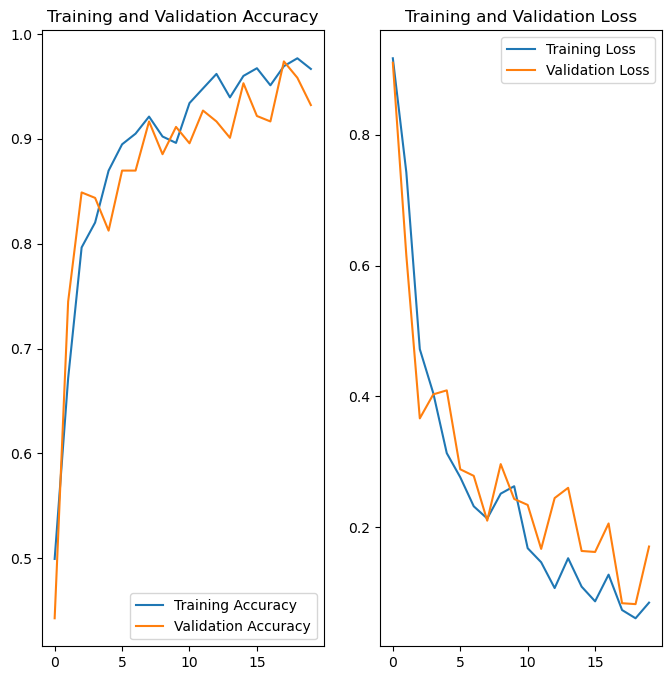

In [49]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run prediction on a sample image

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 0s 442ms/step
predicted label: Potato___healthy


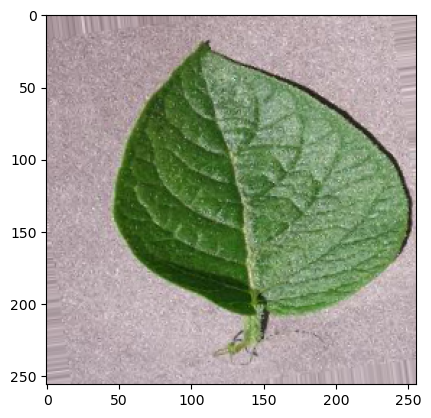

In [63]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

# Write a function for inference

In [64]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


# Now run inference on few sample images

1/1 [==============================] - 0s 64ms/step


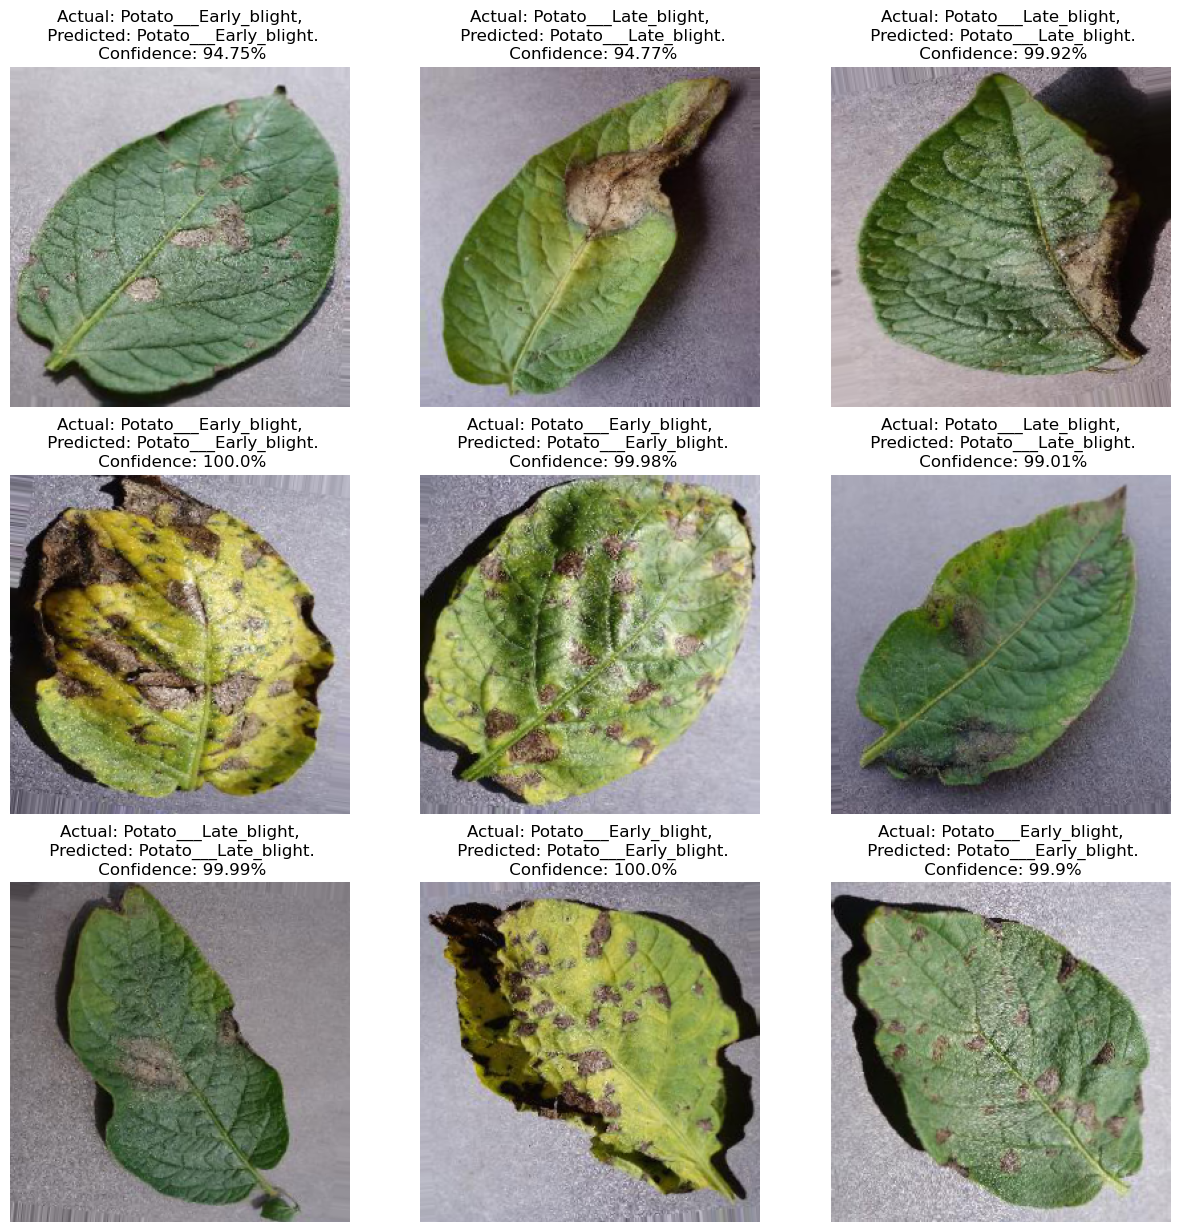

In [66]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

# Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [67]:
model.save("../potatoes.h5")

C:\Users\karba\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
